In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
'''reading the grid tables for the peak and off peak hours'''
off_peak_table = pd.read_csv(r'grids/grid_table_off_peak.csv')
peak_table_1 = pd.read_csv(r'grids/grid_table_peak_1.csv')
peak_table_2 = pd.read_csv(r'grids/grid_table_peak_2.csv')
off_peak_cells = list(off_peak_table['cell_id'])
peak_1_cells = list(peak_table_1['cell_id'])
peak_2_cells = list(peak_table_2['cell_id'])

In [3]:
peak_table_1

,cell_id,num_segments,minSpeed,avgSpeed,maxSpeed,minAccuracyDrop,avgAccuracyDrop,maxAccuracyDrop
0,100_160,472,0.08,6.11,43.86,7,14.10,20
1,100_225,3,4.63,11.71,19.11,10,14.00,20
2,101_102,338,0.01,7.40,74.79,1,12.17,20
3,101_212,2,3.36,21.11,38.87,10,13.00,17
4,101_50,1,76.09,76.09,76.09,19,19.50,20
...,...,...,...,...,...,...,...,...
43211,96_121,150,0.04,7.38,46.82,4,11.37,20
43212,96_86,24,0.03,8.52,37.64,6,7.94,20
43213,97_163,124,0.02,20.03,63.98,7,13.56,20
43214,97_37,57,0.04,56.74,109.25,6,10.89,17


In [4]:
len(peak_2_cells)

41595

In [5]:
len(off_peak_cells)

32549

In [3]:
'''finding the intersection of grid cells'''
intersection = list(set(peak_1_cells) & set(peak_2_cells) & set(off_peak_cells))

len(intersection)

31437

<h2> dropping uncommon cells

In [4]:
df_peak_1 = peak_table_1.loc[peak_table_1['cell_id'].isin(intersection)]
df_peak_1.reset_index(inplace = True)
len(df_peak_1)

31437

In [5]:
df_peak_2 = peak_table_2.loc[peak_table_2['cell_id'].isin(intersection)]
df_peak_2.reset_index(inplace = True)
len(df_peak_2)

31437

In [6]:
df_off_peak = off_peak_table.loc[off_peak_table['cell_id'].isin(intersection)]
df_off_peak.reset_index(inplace = True)
len(df_off_peak)

31437

In [7]:
#merging grid tables with useful columns
df_merged = pd.merge(pd.merge(df_off_peak[['cell_id','num_segments','avgSpeed']],
                     df_peak_1[['cell_id','num_segments','avgSpeed']],on='cell_id'),
                     df_peak_2[['cell_id','num_segments','avgSpeed']],on='cell_id')
# pd.merge(pd.merge(df1,df2,on='name'),df3,on='name')

In [8]:
df_merged.columns = ['cell_id', 'num_segments_offPeak', 'avgSpeed_offPeak',
                     'num_segments_peak1', 'avgSpeed_peak1',
                     'num_segments_peak2', 'avgSpeed_peak2',
                    ]

In [9]:
df_merged

,cell_id,num_segments_offPeak,avgSpeed_offPeak,num_segments_peak1,avgSpeed_peak1,num_segments_peak2,avgSpeed_peak2
0,100_160,137,5.81,472,6.11,557,4.81
1,101_102,14,13.42,338,7.40,108,9.72
2,103_60,292,29.23,1924,19.18,2269,22.69
3,104_113,5111,30.85,21163,23.39,28030,22.57
4,105_192,298,36.10,777,33.77,894,32.89
...,...,...,...,...,...,...,...
31432,96_121,133,5.85,150,7.38,477,6.15
31433,96_86,28,6.08,24,8.52,283,5.22
31434,97_163,17,20.99,124,20.03,133,13.79
31435,97_37,4,22.06,57,56.74,56,30.75


In [10]:
min_num_segments = list(zip(df_merged.num_segments_offPeak,df_merged.num_segments_peak1))
min_num_segments = [min(i[0],i[1]) for i in min_num_segments]
df_merged['min_num_segments_off_p1'] = min_num_segments

min_num_segments = list(zip(df_merged.num_segments_offPeak,df_merged.num_segments_peak2))
min_num_segments = [min(i[0],i[1]) for i in min_num_segments]
df_merged['min_num_segments_off_p2'] = min_num_segments

# df_merged[df_merged['min_num_segments_off_p1'] != df_merged['min_num_segments_off_p2']]
# min_num_segments = list(zip(df_merged.num_segments_offPeak,df_merged.num_segments_peak1,df_merged.num_segments_peak2))
# min_num_segments = [min(i[0],i[1],i[2]) for i in min_num_segments]

In [11]:
df_merged

,cell_id,num_segments_offPeak,avgSpeed_offPeak,num_segments_peak1,avgSpeed_peak1,num_segments_peak2,avgSpeed_peak2,min_num_segments_off_p1,min_num_segments_off_p2
0,100_160,137,5.81,472,6.11,557,4.81,137,137
1,101_102,14,13.42,338,7.40,108,9.72,14,14
2,103_60,292,29.23,1924,19.18,2269,22.69,292,292
3,104_113,5111,30.85,21163,23.39,28030,22.57,5111,5111
4,105_192,298,36.10,777,33.77,894,32.89,298,298
...,...,...,...,...,...,...,...,...,...
31432,96_121,133,5.85,150,7.38,477,6.15,133,133
31433,96_86,28,6.08,24,8.52,283,5.22,24,28
31434,97_163,17,20.99,124,20.03,133,13.79,17,17
31435,97_37,4,22.06,57,56.74,56,30.75,4,4


<h2 style="color:yellow">1- Absolute congestion calculation

In [15]:
df_absCongestionKMH = df_merged.copy()
df_absCongestionKMH['speedDiffKMH_off_p1'] = df_absCongestionKMH['avgSpeed_offPeak'] - df_absCongestionKMH['avgSpeed_peak1']
df_absCongestionKMH['speedDiffKMH_off_p2'] = df_absCongestionKMH['avgSpeed_offPeak'] - df_absCongestionKMH['avgSpeed_peak2']
df_absCongestionKMH

,cell_id,num_segments_offPeak,avgSpeed_offPeak,num_segments_peak1,avgSpeed_peak1,num_segments_peak2,avgSpeed_peak2,min_num_segments_off_p1,min_num_segments_off_p2,speedDiffKMH_off_p1,speedDiffKMH_off_p2
0,100_160,137,5.81,472,6.11,557,4.81,137,137,-0.30,1.00
1,101_102,14,13.42,338,7.40,108,9.72,14,14,6.02,3.70
2,103_60,292,29.23,1924,19.18,2269,22.69,292,292,10.05,6.54
3,104_113,5111,30.85,21163,23.39,28030,22.57,5111,5111,7.46,8.28
4,105_192,298,36.10,777,33.77,894,32.89,298,298,2.33,3.21
...,...,...,...,...,...,...,...,...,...,...,...
31432,96_121,133,5.85,150,7.38,477,6.15,133,133,-1.53,-0.30
31433,96_86,28,6.08,24,8.52,283,5.22,24,28,-2.44,0.86
31434,97_163,17,20.99,124,20.03,133,13.79,17,17,0.96,7.20
31435,97_37,4,22.06,57,56.74,56,30.75,4,4,-34.68,-8.69


In [18]:
#len all
len(df_merged)

31437

In [19]:
#len negative
len(df_absCongestionKMH.loc[df_absCongestionKMH['speedDiffKMH_off_p1'] <0 ])

10918

In [20]:
#len under 100
len(df_absCongestionKMH.loc[df_absCongestionKMH['min_num_segments_off_p1']<=100])

14918

In [21]:
under_100_op1 = len(df_absCongestionKMH.loc[df_absCongestionKMH['min_num_segments_off_p1']<=100])/len(df_absCongestionKMH['min_num_segments_off_p1'])
under_100_op1

0.4745363743359735

In [22]:
negative_values_percentage1= (len(df_absCongestionKMH.loc[df_absCongestionKMH['speedDiffKMH_off_p1'] <0 ]) / len(df_absCongestionKMH))*100
negative_values_percentage1

34.729777014346155

In [23]:
under_100_op2 = len(df_absCongestionKMH.loc[df_absCongestionKMH['min_num_segments_off_p2']<=100])/len(df_absCongestionKMH['min_num_segments_off_p2'])
under_100_op2

0.47288227248147086

In [24]:
negative_values_percentage2= (len(df_absCongestionKMH.loc[df_absCongestionKMH['speedDiffKMH_off_p2'] <0 ]) / len(df_absCongestionKMH))*100
negative_values_percentage2

29.777014346152626

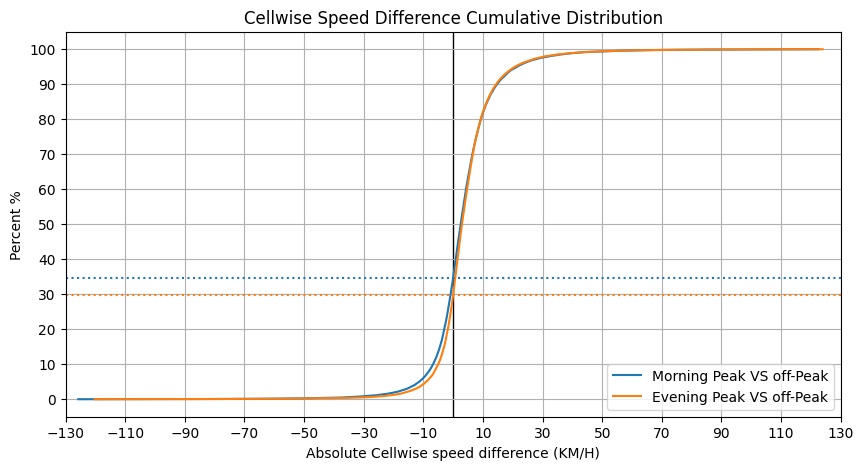

In [33]:
#CDF plot
speedDiffs = {'speedDiffKMH_off_p1' : df_absCongestionKMH['speedDiffKMH_off_p1'], 
    'speedDiffKMH_off_p2' : df_absCongestionKMH['speedDiffKMH_off_p2']}
# matplotlib.rcParams.update(matplotlib.rcParamsDefault)
plt.rcParams["figure.figsize"] = (10,5)
for key,value in speedDiffs.items():
    x = list(value)
    x.sort()
    y = (1. * np.arange(len(x)) / (len(x) - 1))*100
    
    
    plt.plot(x, y, zorder=2)
#     plt.hlines(y=(len(df_absCongestionKMH.loc[value <0 ]) / len(df_absCongestionKMH))*100
#                ,xmin = min(x), xmax = max(x),colors = colors[0], ls=':'

title = 'Cellwise Speed Difference Cumulative Distribution'
plt.title(title)
# title = 'Absolute Congestion'
plt.xlabel('Absolute Cellwise speed difference (KM/H)')
plt.ylabel('Percent %')
# plt.ylim(0,1)
plt.xlim(-125,125)
plt.grid(True)
plt.yticks(np.arange(0,110,10))
plt.xticks(np.arange(-130,131,20))
plt.legend(['Morning Peak VS off-Peak' , 'Evening Peak VS off-Peak'],loc ='lower right')

plt.axvline(x=0,ymin = 0, ymax = 1,color='black', linewidth = 1, zorder=1)
plt.axhline(y=len(df_absCongestionKMH.loc[df_absCongestionKMH['speedDiffKMH_off_p1'] <0 ]) / len(df_absCongestionKMH)*100
           ,xmin = 0, xmax = 1,color = '#1f77b4', ls=':')
plt.axhline(y=(len(df_absCongestionKMH.loc[df_absCongestionKMH['speedDiffKMH_off_p2'] <0 ]) / len(df_absCongestionKMH))*100
           ,xmin = 0, xmax = 1,color = '#ff7f0e', ls=':')         
title='abs_congestion_p1_2'
# plt.savefig(f'{title}_CDF.jpg',bbox_inches='tight')
plt.show()

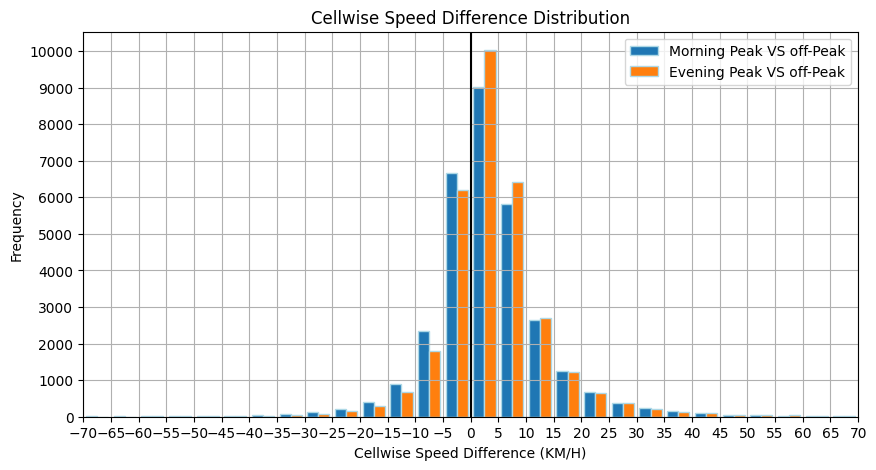

In [34]:
plt.rcParams["figure.figsize"] = (10,5)
# matplotlib.rcParams.update(matplotlib.rcParamsDefault)
x_p1 = df_absCongestionKMH['speedDiffKMH_off_p1']
x_p2 = df_absCongestionKMH['speedDiffKMH_off_p2']
bins = np.arange(-125,126,5)
plt.hist([x_p1,x_p2],bins=bins,edgecolor="lightblue")
plt.xticks(np.arange(-75,76,5))
plt.xlim(-70,70)
plt.yticks(np.arange(0,10001,1000))
# plt.xlim(-50,10)
title='Cellwise Speed Difference Distribution'
plt.title(title)
plt.xlabel('Cellwise Speed Difference (KM/H)')

plt.ylabel('Frequency')
plt.legend(['Morning Peak VS off-Peak' , 'Evening Peak VS off-Peak'],loc ='best')
plt.axvline(x=0,ymin = 0, ymax = 1,color='black', linewidth = 1.5)
plt.grid()
title = 'abs_congestion_p1_2'
# plt.savefig(f'{title}_Histogram.jpg',bbox_inches='tight')
plt.show()

<h2 style="color:cyan">2- Relative congestion calculation

In [13]:
df_relCongestion = df_merged.copy()

In [14]:
df_relCongestion

,cell_id,num_segments_offPeak,avgSpeed_offPeak,num_segments_peak1,avgSpeed_peak1,num_segments_peak2,avgSpeed_peak2,min_num_segments_off_p1,min_num_segments_off_p2
0,100_160,137,5.81,472,6.11,557,4.81,137,137
1,101_102,14,13.42,338,7.40,108,9.72,14,14
2,103_60,292,29.23,1924,19.18,2269,22.69,292,292
3,104_113,5111,30.85,21163,23.39,28030,22.57,5111,5111
4,105_192,298,36.10,777,33.77,894,32.89,298,298
...,...,...,...,...,...,...,...,...,...
31432,96_121,133,5.85,150,7.38,477,6.15,133,133
31433,96_86,28,6.08,24,8.52,283,5.22,24,28
31434,97_163,17,20.99,124,20.03,133,13.79,17,17
31435,97_37,4,22.06,57,56.74,56,30.75,4,4


In [16]:
def relative_speed_difference(row,avgSpeed):
    if row['avgSpeed_offPeak'] >= row[avgSpeed]:
        speedDiff = (row['avgSpeed_offPeak'] - row[avgSpeed])/row['avgSpeed_offPeak']
    else:
        speedDiff = -(row[avgSpeed] - row['avgSpeed_offPeak'])/row[avgSpeed]
    return speedDiff*100
    
df_relCongestion['speedDiff%_p1'] = df_relCongestion.apply(lambda row: relative_speed_difference(row,'avgSpeed_peak1'), axis=1)
df_relCongestion['speedDiff%_p1'] = [float("{0:.2f}".format(i)) for i in df_relCongestion['speedDiff%_p1']]

df_relCongestion['speedDiff%_p2'] = df_relCongestion.apply(lambda row: relative_speed_difference(row,'avgSpeed_peak2'), axis=1)
df_relCongestion['speedDiff%_p2'] = [float("{0:.2f}".format(i)) for i in df_relCongestion['speedDiff%_p2']]

In [17]:
df_relCongestion

,cell_id,num_segments_offPeak,avgSpeed_offPeak,num_segments_peak1,avgSpeed_peak1,num_segments_peak2,avgSpeed_peak2,min_num_segments_off_p1,min_num_segments_off_p2,speedDiff%_p1,speedDiff%_p2
0,100_160,137,5.81,472,6.11,557,4.81,137,137,-4.91,17.21
1,101_102,14,13.42,338,7.40,108,9.72,14,14,44.86,27.57
2,103_60,292,29.23,1924,19.18,2269,22.69,292,292,34.38,22.37
3,104_113,5111,30.85,21163,23.39,28030,22.57,5111,5111,24.18,26.84
4,105_192,298,36.10,777,33.77,894,32.89,298,298,6.45,8.89
...,...,...,...,...,...,...,...,...,...,...,...
31432,96_121,133,5.85,150,7.38,477,6.15,133,133,-20.73,-4.88
31433,96_86,28,6.08,24,8.52,283,5.22,24,28,-28.64,14.14
31434,97_163,17,20.99,124,20.03,133,13.79,17,17,4.57,34.30
31435,97_37,4,22.06,57,56.74,56,30.75,4,4,-61.12,-28.26


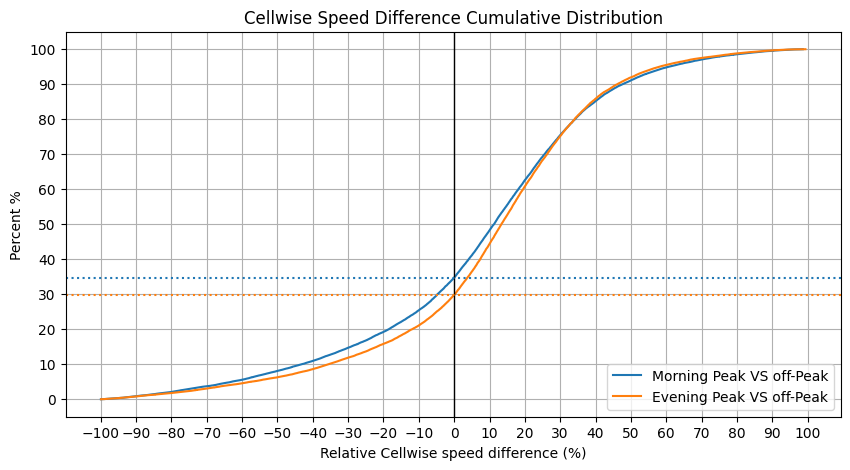

In [49]:
#CDF plot
speedDiffs = {'speedDiff%_p1' : df_relCongestion['speedDiff%_p1'], 
    'speedDiff%_p2' : df_relCongestion['speedDiff%_p2']}
plt.rcParams["figure.figsize"] = (10,5)
for key,value in speedDiffs.items():
    x = list(value)
    x.sort()
    y = (1. * np.arange(len(x)) / (len(x) - 1))*100
    
#     matplotlib.rcParams.update(matplotlib.rcParamsDefault)
    plt.plot(x, y)

title = 'Cellwise Speed Difference Cumulative Distribution'
plt.title(title)
title = 'Relative Congestion'
plt.xlabel('Relative Cellwise speed difference (%)')
plt.ylabel('Percent %')
# plt.ylim(0,1)
# plt.xlim(-1000,160)
plt.grid(True)
plt.yticks(np.arange(0,110,10))
plt.xticks(np.arange(-100,101,10))

plt.legend(['Morning Peak VS off-Peak' , 'Evening Peak VS off-Peak'],loc ='lower right')

plt.axvline(x=0,ymin = 0, ymax = 1,color='black', linewidth = 1)
plt.axhline(y=len(df_relCongestion.loc[df_relCongestion['speedDiff%_p1'] <0 ]) / len(df_relCongestion)*100
           ,xmin = 0, xmax = 1,color = '#1f77b4', ls=':')
plt.axhline(y=(len(df_relCongestion.loc[df_relCongestion['speedDiff%_p2'] <0 ]) / len(df_absCongestionKMH))*100
           ,xmin = 0, xmax = 1,color = '#ff7f0e', ls=':')   
title='rel_congestion_p1_2'
plt.savefig(f'{title}_CDF.jpg',bbox_inches='tight')
plt.show()

In [50]:
#under 100 p1
len(df_relCongestion.loc[df_relCongestion['min_num_segments_off_p1']<=100])/len(df_relCongestion['min_num_segments_off_p1'])

0.4745363743359735

In [51]:
# %negatively congested cells p1 
len(df_relCongestion.loc[df_relCongestion['speedDiff%_p1'] <0 ]) / len(df_relCongestion)*100

34.729777014346155

In [52]:
#under 100 p2
len(df_relCongestion.loc[df_relCongestion['min_num_segments_off_p2']<=100])/len(df_relCongestion['min_num_segments_off_p2'])

0.47288227248147086

In [53]:
# %negatively congested cells p2
len(df_relCongestion.loc[df_relCongestion['speedDiff%_p2'] <0 ]) / len(df_absCongestionKMH)*100

29.777014346152626

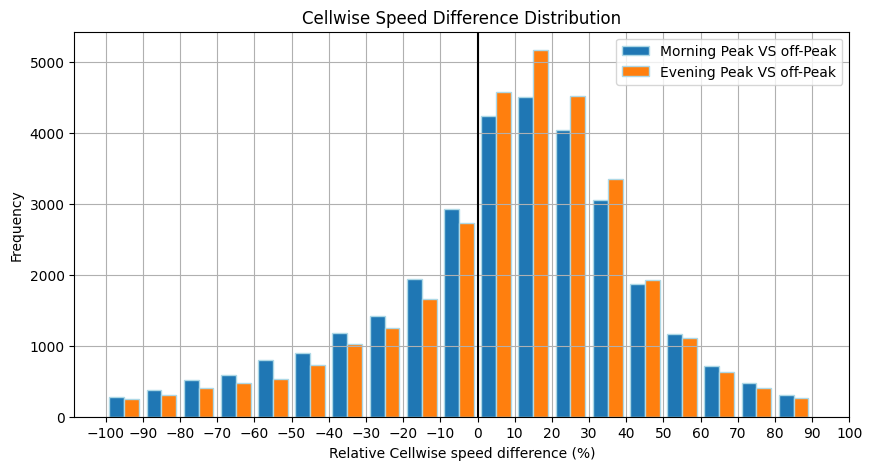

In [55]:
plt.rcParams["figure.figsize"] = (10,5)
# matplotlib.rcParams.update(matplotlib.rcParamsDefault)

x_p1 = df_relCongestion['speedDiff%_p1']
x_p2 = df_relCongestion['speedDiff%_p2']
bins = np.arange(-100,100,10)

plt.hist([x_p1,x_p2],bins=bins,edgecolor="lightblue")
plt.xticks(np.arange(-100,101,10))
# plt.yticks(np.arange(0,3000,500))
# plt.xlim(-50,10)
title='Cellwise Speed Difference Distribution'
plt.title(title)
plt.xlabel('Relative Cellwise speed difference (%)')
title = 'Relative Congestion'
plt.ylabel('Frequency')

plt.grid()
plt.legend(['Morning Peak VS off-Peak' , 'Evening Peak VS off-Peak'],loc ='best')
plt.axvline(x=0,ymin = 0, ymax = 1,color='black', linewidth = 1.5)
title='rel_congestion_p1_2'
plt.savefig(f'{title}_Histogram.jpg',bbox_inches='tight')
plt.show()

<strong style="color:cyan">Cells behavior based on density investigation

In [18]:
#negative congestion extraction
df_rel_negative_conge = df_relCongestion[df_relCongestion['speedDiff%_p2'] < 0]

df_rel_negative_conge 

,cell_id,num_segments_offPeak,avgSpeed_offPeak,num_segments_peak1,avgSpeed_peak1,num_segments_peak2,avgSpeed_peak2,min_num_segments_off_p1,min_num_segments_off_p2,speedDiff%_p1,speedDiff%_p2
12,110_164,267,13.87,1090,19.45,1458,16.37,267,267,-28.69,-15.27
15,112_62,83,7.02,919,7.34,466,9.70,83,83,-4.36,-27.63
16,113_58,279,6.31,1727,8.37,2494,8.48,279,279,-24.61,-25.59
17,114_54,26002,0.34,8668,1.33,12066,1.06,8668,12066,-74.44,-67.92
18,115_131,139,6.25,771,5.76,808,10.12,139,139,7.84,-38.24
...,...,...,...,...,...,...,...,...,...,...,...
31427,87_142,422,6.60,1048,8.19,1643,7.03,422,422,-19.41,-6.12
31430,93_121,2,3.61,9,21.67,6,18.80,2,2,-83.34,-80.80
31432,96_121,133,5.85,150,7.38,477,6.15,133,133,-20.73,-4.88
31435,97_37,4,22.06,57,56.74,56,30.75,4,4,-61.12,-28.26


In [19]:
df_rel_positive_conge = df_relCongestion[df_relCongestion['speedDiff%_p2'] >= 0]

df_rel_positive_conge 

,cell_id,num_segments_offPeak,avgSpeed_offPeak,num_segments_peak1,avgSpeed_peak1,num_segments_peak2,avgSpeed_peak2,min_num_segments_off_p1,min_num_segments_off_p2,speedDiff%_p1,speedDiff%_p2
0,100_160,137,5.81,472,6.11,557,4.81,137,137,-4.91,17.21
1,101_102,14,13.42,338,7.40,108,9.72,14,14,44.86,27.57
2,103_60,292,29.23,1924,19.18,2269,22.69,292,292,34.38,22.37
3,104_113,5111,30.85,21163,23.39,28030,22.57,5111,5111,24.18,26.84
4,105_192,298,36.10,777,33.77,894,32.89,298,298,6.45,8.89
...,...,...,...,...,...,...,...,...,...,...,...
31428,8_144,420,92.80,1920,84.51,1976,90.85,420,420,8.93,2.10
31429,92_70,59,36.15,790,21.33,644,23.04,59,59,41.00,36.27
31431,94_113,623,10.84,1915,7.39,3196,7.82,623,623,31.83,27.86
31433,96_86,28,6.08,24,8.52,283,5.22,24,28,-28.64,14.14


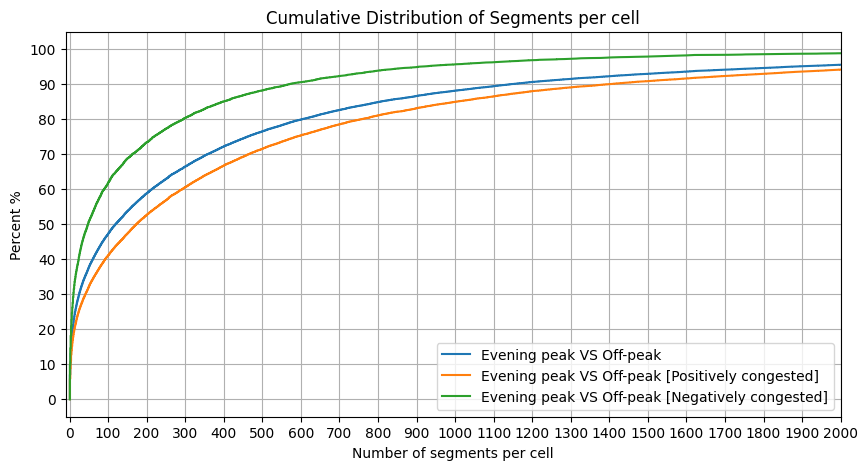

In [23]:
#CDF of negative congestion based on number of segments per cell [relative]
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
dfs = [df_relCongestion,df_rel_positive_conge,df_rel_negative_conge]
for df in dfs:
    x = list(df['min_num_segments_off_p2'])
    x.sort()
# y = df_negative_conge.speedDiffKMH
    y = (1. * np.arange(len(x)) / (len(x) - 1))*100

    plt.rcParams["figure.figsize"] = (10,5)
    plt.plot( x,y)
plt.title('Cumulative Distribution of Segments per cell')
# title = 'Absolute Congestion'
plt.xlabel('Number of segments per cell')
plt.ylabel('Percent %')
# plt.ylim(0,1)
plt.xlim(-10,2000)
plt.grid(True)
plt.yticks(np.arange(0,110,10))
plt.xticks(np.arange(0,2001,100))
plt.legend(['Evening peak VS Off-peak','Evening peak VS Off-peak [Positively congested]','Evening peak VS Off-peak [Negatively congested]'],loc='lower right')
# plt.vlines(x=70,ymin = 0, ymax = max(y),colors='red', ls=':')
title='congestion_num_segments'
plt.savefig(f'{title}_CDF.jpg',bbox_inches='tight')
plt.show()

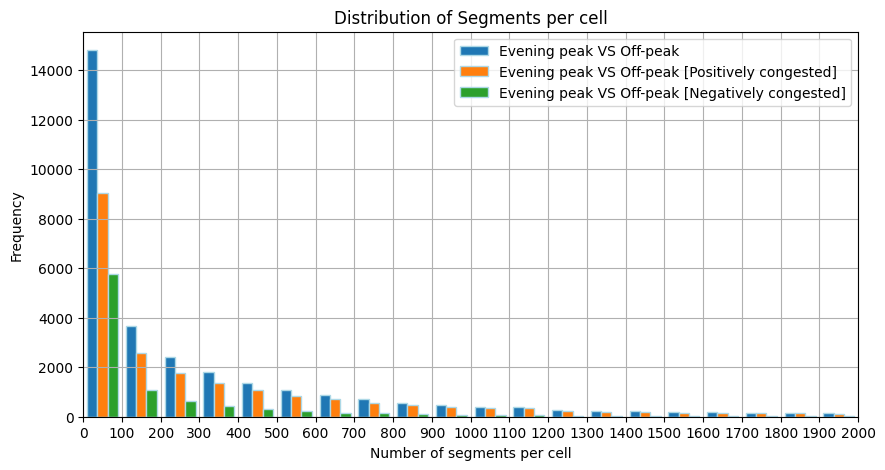

In [24]:
plt.rcParams["figure.figsize"] = (10,5)

bins = np.arange(0,max(x)+1,100)
plt.hist([list(df['min_num_segments_off_p2']) for df in dfs],bins=bins,edgecolor="lightblue")    
title='Distribution of Segments per cell'
plt.title(title)
plt.xlabel('Number of segments per cell')
plt.ylabel('Frequency')
plt.xticks(np.arange(0,2001,100))
plt.xlim(0,2000)
plt.grid()
plt.legend(['Evening peak VS Off-peak','Evening peak VS Off-peak [Positively congested]','Evening peak VS Off-peak [Negatively congested]'])
title='congestion_num_segments'
plt.savefig(f'{title}_Histogram.jpg',bbox_inches='tight')
plt.show()

In [97]:
len(df_relCongestion.loc[df_relCongestion['min_num_segments_off_p2']<=100])/len(df_relCongestion['min_num_segments_off_p2'])

0.4745363743359735

In [98]:
len(df_rel_positive_conge.loc[df_rel_positive_conge['min_num_segments_off_p2']<=100])/len(df_rel_positive_conge['min_num_segments_off_p2'])

0.4110799057800326

In [99]:
len(df_rel_negative_conge.loc[df_rel_negative_conge['min_num_segments_off_p2']<=100])/len(df_rel_negative_conge['min_num_segments_off_p2'])

0.6186304881957055

In [86]:
df_relCongestion_above100 = df_relCongestion[df_relCongestion['min_num_segments_off_p2']>100]
df_rel_negative_conge_above100 = df_rel_negative_conge[df_rel_negative_conge['min_num_segments_off_p2']>100]
df_rel_positive_conge_above100 = df_rel_positive_conge[df_rel_positive_conge['min_num_segments_off_p2']>100]

In [103]:
len(df_relCongestion_above100)

16571

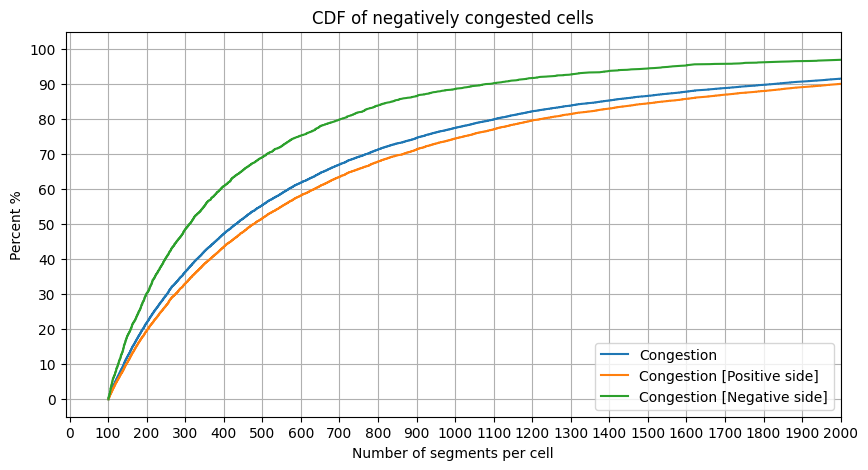

In [87]:
dfs=[df_relCongestion_above100,df_rel_positive_conge_above100,df_rel_negative_conge_above100]
for df in dfs:
    x = list(df['min_num_segments_off_p2'])
    x.sort()
# y = df_negative_conge.speedDiffKMH
    y = (1. * np.arange(len(x)) / (len(x) - 1))*100
# matplotlib.rcParams.update(matplotlib.rcParamsDefault)
    plt.rcParams["figure.figsize"] = (10,5)
    plt.plot( x,y)
plt.title('CDF of negatively congested cells')
# title = 'Absolute Congestion'
plt.xlabel('Number of segments per cell')
plt.ylabel('Percent %')
# plt.ylim(0,1)
plt.xlim(-10,2000)
plt.grid(True)
plt.yticks(np.arange(0,110,10))
plt.xticks(np.arange(0,2001,100))
plt.legend(['Congestion','Congestion [Positive side]','Congestion [Negative side]'],loc='lower right')
title='negative_congestion_num_segments'
# plt.savefig(f'{title}_CDF.jpg',bbox_inches='tight')
plt.show()

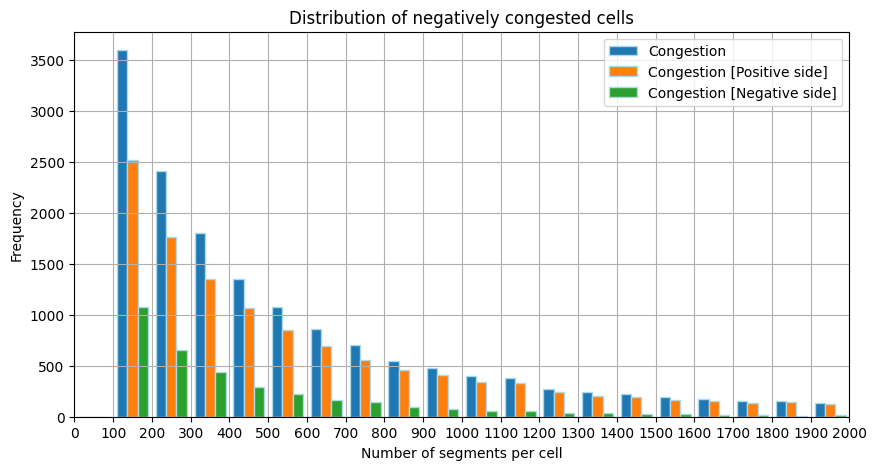

In [88]:
plt.rcParams["figure.figsize"] = (10,5)

bins = np.arange(0,max(x)+1,100)
plt.hist([list(df['min_num_segments_off_p2']) for df in dfs],bins=bins,edgecolor="lightblue")    
title='Distribution of negatively congested cells'
plt.title(title)
plt.xlabel('Number of segments per cell')
plt.ylabel('Frequency')
plt.xticks(np.arange(0,2001,100))
plt.xlim(0,2000)
plt.grid()
plt.legend(['Congestion','Congestion [Positive side]','Congestion [Negative side]'])
title='negative_congestion_num_segments'
# plt.savefig(f'{title}_Histogram.jpg',bbox_inches='tight')
plt.show()

<strong style="color:yellow">under 100 plots

In [91]:
df_relCongestion_above200 = df_relCongestion.loc[df_relCongestion['min_num_segments_off_p2']>200]

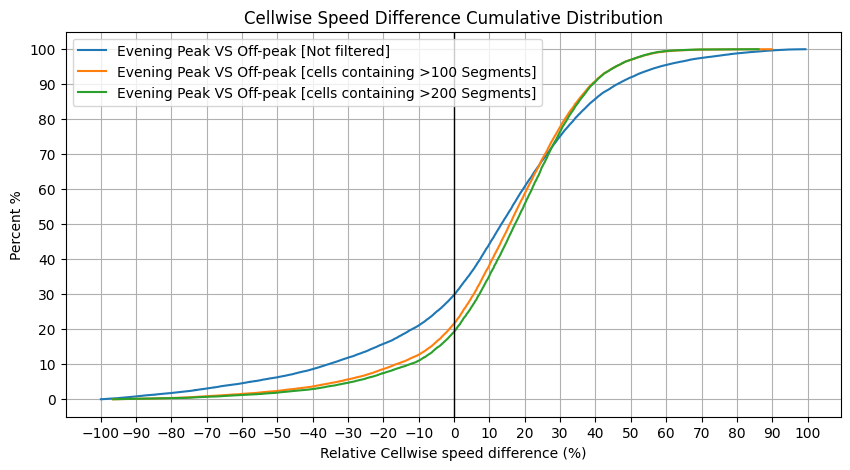

In [102]:
#CDF plot
speedDiffs = {'total' : df_relCongestion['speedDiff%_p2'], 
    'above_100' : df_relCongestion_above100['speedDiff%_p2'],
    'above_200' : df_relCongestion_above200['speedDiff%_p2']        }
plt.rcParams["figure.figsize"] = (10,5)
for key,value in speedDiffs.items():
    x = list(value)
    x.sort()
    y = (1. * np.arange(len(x)) / (len(x) - 1))*100
    
#     matplotlib.rcParams.update(matplotlib.rcParamsDefault)
    plt.plot(x, y)

title = 'Cellwise Speed Difference Cumulative Distribution'
plt.title(title)
title = 'Relative Congestion'
plt.xlabel('Relative Cellwise speed difference (%)')
plt.ylabel('Percent %')
# plt.ylim(0,1)
# plt.xlim(-1000,160)
plt.grid(True)
plt.yticks(np.arange(0,110,10))
plt.xticks(np.arange(-100,101,10))
# plt.hlines(y=negative_values_percentage,xmin = min(x), xmax = max(x),colors='red', ls=':')
plt.legend(['Evening Peak VS Off-peak [Not filtered]',
            'Evening Peak VS Off-peak [cells containing >100 Segments]','Evening Peak VS Off-peak [cells containing >200 Segments]'])

plt.axvline(x=0,ymin = 0, ymax = 1,color='black', linewidth = 1)
# plt.axhline(y=len(df_relCongestion.loc[df_relCongestion['speedDiff%_p1'] <0 ]) / len(df_relCongestion)*100
#            ,xmin = 0, xmax = 1,color = '#1f77b4', ls=':')
# plt.axhline(y=(len(df_relCongestion.loc[df_relCongestion['speedDiff%_p2'] <0 ]) / len(df_absCongestionKMH))*100
#            ,xmin = 0, xmax = 1,color = '#ff7f0e', ls=':')   
title='rel_congestion_p2_above100'
plt.savefig(f'{title}_CDF.jpg',bbox_inches='tight')
plt.show()